In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


# Preparing The Data

In [8]:
import pathlib
flowers_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
flowers_data = tf.keras.utils.get_file('flower_photos', origin=flowers_url, untar=True)
flowers_data = pathlib.Path(flowers_data)


In [9]:
print(flowers_data)

/home/svupper/.keras/datasets/flower_photos


/home/svupper/.keras/datasets/flower_photos/sunflowers/15054866898_60ee50ec6b_n.jpg


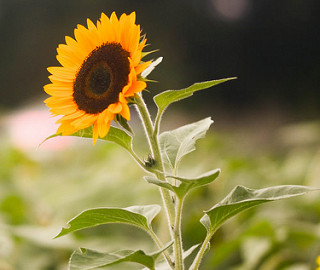

In [10]:
all_sunflowers = list(flowers_data.glob('sunflowers/*'))
print(all_sunflowers[1])
PIL.Image.open(str(all_sunflowers[1]))


In [11]:
height,width=180,180

training_batch_size=32

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height,width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  flowers_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
image_cat = train_set.class_names
print(image_cat)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.version)

<module 'tensorflow._api.v2.version' from '/home/svupper/.cache/pypoetry/virtualenvs/kaggle-flowers-classification-keras-q23kQ_ea-py3.10/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [15]:
print(tf.version.VERSION)


2.16.2


# Training The Model


In [18]:
dnn_model = Sequential()
dnn_model.add(keras.Input(shape=(180,180,3)))
imported_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in imported_model.layers:
        layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [19]:
dnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:

history = dnn_model.fit(
  train_set,
  validation_data=validation_set,
  epochs=10
)

Epoch 1/10


2024-07-01 10:13:53.640595: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-07-01 10:13:53.737812: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 69337088 exceeds 10% of free system memory.
2024-07-01 10:13:53.761536: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-07-01 10:13:53.819991: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-07-01 10:13:53.961396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.


92/92 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.6742 - loss: 1.0876 - val_accuracy: 0.8324 - val_loss: 0.4496
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8913 - loss: 0.2812 - val_accuracy: 0.8760 - val_loss: 0.3466
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9356 - loss: 0.1840 - val_accuracy: 0.8665 - val_loss: 0.3624
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9665 - loss: 0.1004 - val_accuracy: 0.8624 - val_loss: 0.3998
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9839 - loss: 0.0598 - val_accuracy: 0.8733 - val_loss: 0.3752
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9936 - loss: 0.0311 - val_accuracy: 0.8787 - val_loss: 0.4113
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9984 - loss: 0.0179 - val_accuracy: 0.8815 - val_loss: 0.4312
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9992 - loss: 0.0096 - val_accuracy: 0.8910 - val_loss: 0.

# Making Predictions

In [23]:
import cv2
sample_image=cv2.imread(str(all_sunflowers[1]))
sample_image_resized= cv2.resize(sample_image, (height, width))
sample_image=np.expand_dims(sample_image_resized,axis=0)
print(sample_image.shape)


(1, 180, 180, 3)


In [24]:
model_pred=dnn_model.predict(sample_image)
print(model_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.7538569  0.00156626 0.00089406 0.22462475 0.01905794]]


In [25]:
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

The predicted category is daisy
